In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [2]:
# load the data set
df = pd.read_csv(r'C:\Users\Jonat\OneDrive\General Assembly\Data-Science\Machine Learning Bootcamp\Data\housing.csv')

In [3]:
# let's standardize the data
X = df.drop('PRICE', axis=1)
y = df.PRICE
X = (X - X.mean()) / X.std()
# double check to make sure it has mean 0 and standard deviation 1
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.167427e-15,-1.258809e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


In [4]:
# fit the model
lreg = LinearRegression()
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
# now let's build our predictions -- notice they're not different from the previous model
df['PREDICTION'] = lreg.predict(X)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524


In [6]:
# let's go ahead and get our error term
df['ERROR'] = df.PRICE - df.PREDICTION
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION,ERROR
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843,-6.003843
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562,-3.425562
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597,4.132403
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036,4.792964
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524,8.256476


In [7]:
# let's calculate the mean squared error -- again --- no different
mse = ((df.PRICE - df.PREDICTION)**2).sum() / len(df)
mse

21.894831181729202

In [8]:
# score of the model will not change either
lreg.score(X, y)

0.7406426641094095

### Model Interpretation

In [9]:
# first, let's visualize coefficients
coeffs = pd.DataFrame({'Variable': df.columns[:-3],
                       'Weight'  : lreg.coef_})

In [10]:
# coefficient weight, from largest to smallest -- notice the difference from before
coeffs.sort_values(by='Weight', ascending=False, inplace=True)
coeffs

,Variable,Weight
5,RM,2.676877
8,RAD,2.664852
1,ZN,1.082639
11,B,0.850109
3,CHAS,0.682414
2,INDUS,0.141039
6,AGE,0.019485
0,CRIM,-0.929065
4,NOX,-2.058754
10,PTRATIO,-2.062646


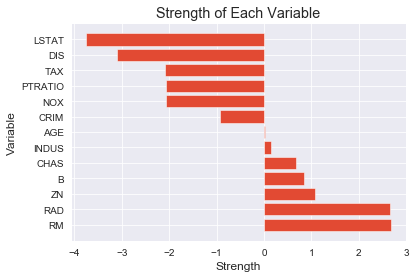

In [11]:
# plot the relative importance of each weight
plt.barh(coeffs.Variable, coeffs.Weight)
plt.title('Strength of Each Variable')
plt.xlabel('Strength')
plt.ylabel('Variable')
plt.show()

The above graph is the correct way to interpret your coefficients.

An important take home point is that standardizing data will not necessarily change the accuracy of your results, but will change how you interpret the importance of different variables.

### Cross Validation

In [12]:
# let's first create a training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [13]:
# confirm that we have equal results
print("Length of X_train: ", X_train.shape)
print("Length of y_train: ", y_train.shape)
print("Length of X_test: ", X_test.shape)
print("Length of y_test: ", y_test.shape)

Length of X_train:  (404, 13)
Length of y_train:  (404,)
Length of X_test:  (102, 13)
Length of y_test:  (102,)


In [14]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lreg.score(X_train, y_train)

0.7285831776605591

In [16]:
# now, let's do a quick check to see if our model is consistent:
lreg.fit(X_train, y_train)
print("Score on training set: ", lreg.score(X_train, y_train), "Score on test set: ", lreg.score(X_test, y_test))

Score on training set:  0.7285831776605591 Score on test set:  0.7789207451814417


This is a fairly big divergence, let's check to see how stable it is across different test sets.

In [37]:
test_scores = []
# create 10 different Train/Test Splits, and see how it affects the test results
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lreg.fit(X_train, y_train)
    test_scores.append(lreg.score(X_test, y_test))

In [38]:
# Here are our results
test_scores

[0.5892223849182505,
 0.7634174432138471,
 0.7789207451814417,
 0.795261756324386,
 0.7263451459702508,
 0.7334492147453071,
 0.6839026890069027,
 0.5785415472763408,
 0.7079627967134523,
 0.7660111574904013]

In [39]:
# clearly, there's a lot of variation 
print("The Average Test Score: ", np.mean(test_scores))
print("The Std Deviation of the Test Score: ", np.std(test_scores))
print("The Max Test Score: ", max(test_scores))
print("The Min Test Score: ", min(test_scores))

The Average Test Score:  0.7123034880840581
The Std Deviation of the Test Score:  0.07164360058083669
The Max Test Score:  0.795261756324386
The Min Test Score:  0.5785415472763408


In [40]:
# now, let's do a more thorough form of cross validation, using the cross_val_score to implement
# 10-fold cross validation using the KFold method
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=2)
lreg   = LinearRegression()
scores = cross_val_score(estimator=lreg,
                         X  = X_train,
                         y  = y_train,
                         cv = 10)

In [41]:
# now let's take a look at our scores list
scores

array([0.60987186, 0.81002548, 0.65383713, 0.77406344, 0.60745013,
       0.50529882, 0.58956856, 0.80161848, 0.7082307 , 0.82373483])

In [22]:
np.mean(scores)

0.6883699418111651

In [23]:
np.std(scores)

0.10529293007839166

The above results better reflect the true reality of our dataset, because some of the validation sets are catching the large outlier values, and it's showing in in their smaller validation scores.

In [24]:
min(scores)

0.5052988193039338

In [25]:
# clearly there's a big spread between the min and max values
max(scores)

0.8237348257367716

### Group Activity 

This example redoes the previous example, but this time taking the log of y, which makes it less sensitive to outliers.

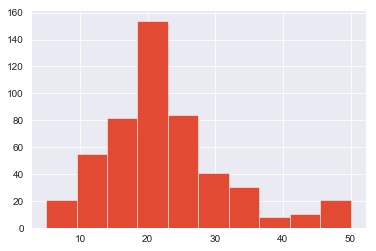

In [26]:
# take a look at the right tail of the y column
y.hist()

In [27]:
# take the log of y
y_norm = np.log1p(y)
np.expm1(4)

53.598150033144236

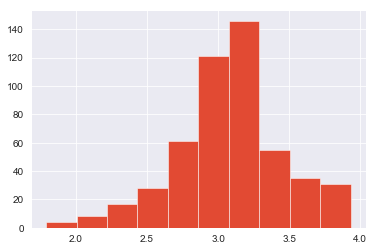

In [28]:
# now notice how it's more centered, and has less of a right tail
y_norm.hist()

In [29]:
# create the training/test set
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.2, random_state=2)

In [30]:
# initiate the model, create your cross validation scores
lreg = LinearRegression()
norm_scores = cross_val_score(estimator=lreg,
                              X=X_train,
                              y=y_train,
                              cv=10)

In [31]:
# the results of our cross validation
norm_scores

array([0.70527719, 0.85455438, 0.75819701, 0.83572558, 0.68818551,
       0.57638005, 0.68800233, 0.80123151, 0.71772649, 0.8630028 ])

In [32]:
# the average -- higher than the previous value of 0.68
np.mean(norm_scores)

0.748828285981016

In [33]:
# the std dev
np.std(norm_scores)

0.08635889844799795

In [34]:
# min of our scores
min(norm_scores)

0.5763800495147167

In [35]:
# the max
max(norm_scores)

0.8630028047966813

In [36]:
# now that we know this option is superior, let's fit it on all of our training data
lreg.fit(X_train, y_train)
# the final score on our test set
lreg.score(X_test, y_test)

0.8151424760979473